In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Graduates' subjective wellbeing by subject area of degree, provider type and level of qualification obtained
#When first downloading and opening the CSV, there are a dozen or so lines that need to be manually removed. 
#This can be done in the CSV itself.
data = pd.read_csv(r"C:\Users\Tom\Downloads\wellbeing_data.csv")

In [3]:
#checking out the data
data

,Subject area of degree,Provider type,Level of qualification,Subjective wellbeing question,Graduate response,Percentage
0,(1) Medicine & dentistry,All,All,How anxious did you feel yesterday?,Very low (0-1),0.27
1,(1) Medicine & dentistry,All,All,How anxious did you feel yesterday?,Low (2-3),0.27
2,(1) Medicine & dentistry,All,All,How anxious did you feel yesterday?,Medium (4-5),0.20
3,(1) Medicine & dentistry,All,All,How anxious did you feel yesterday?,High (6-10),0.26
4,(1) Medicine & dentistry,All,Postgraduate,How anxious did you feel yesterday?,Very low (0-1),0.28
...,...,...,...,...,...,...
3131,Total,Higher education providers (HEPs),Postgraduate,How satisfied are you with your life nowadays?,Very High (9-10),0.27
3132,Total,Higher education providers (HEPs),Undergraduate,How satisfied are you with your life nowadays?,Low (0-4),0.07
3133,Total,Higher education providers (HEPs),Undergraduate,How satisfied are you with your life nowadays?,Medium (5-6),0.17
3134,Total,Higher education providers (HEPs),Undergraduate,How satisfied are you with your life nowadays?,High (7-8),0.52


In [4]:
#focuses only on cumulative scores
for i in range(len(data)):
    if data['Provider type'][i] != 'All':
        data = data.drop(labels=i, axis=0)
    else:
        pass
#resetting index to avoid issues later on - will do this frequently    
data.reset_index(drop=True, inplace=True)

In [5]:
#focuses only on cumulative scores
for i in range(len(data)):
    if data['Level of qualification'][i] != 'All':
        data = data.drop(labels=i, axis=0)
    else:
        pass
data.reset_index(drop=True, inplace=True)

In [6]:
#you can see we dropped 80-90% of the dataset
len(data)

368

In [7]:
#removes brackets from titles
for i in range(len(data)):
    if data['Subject area of degree'].str.get(0)[i] == '(':
        data.loc[i,'Subject area of degree'] = data['Subject area of degree'].str[4:][i]
    else:
        pass
data.reset_index(drop=True, inplace=True)

In [8]:
#checking out the data again
data

,Subject area of degree,Provider type,Level of qualification,Subjective wellbeing question,Graduate response,Percentage
0,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Very low (0-1),0.27
1,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Low (2-3),0.27
2,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Medium (4-5),0.20
3,Medicine & dentistry,All,All,How anxious did you feel yesterday?,High (6-10),0.26
4,Subjects allied to medicine,All,All,How anxious did you feel yesterday?,Very low (0-1),0.34
...,...,...,...,...,...,...
363,Unknown subject,All,All,How satisfied are you with your life nowadays?,Very High (9-10),0.34
364,Total,All,All,How satisfied are you with your life nowadays?,Low (0-4),0.07
365,Total,All,All,How satisfied are you with your life nowadays?,Medium (5-6),0.16
366,Total,All,All,How satisfied are you with your life nowadays?,High (7-8),0.52


In [9]:
#removes totals 
for i in range(len(data)):
    if data['Subject area of degree'].str.get(0)[i] == 'T':
        data = data.drop(labels=i, axis=0)
    else:
        pass
data.reset_index(drop=True, inplace=True)

In [10]:
#removes 'unknown subject'
for i in range(len(data)):
    if data['Subject area of degree'][i] == 'Unknown subject':
        data = data.drop(labels=i, axis=0)
    else:
        pass
data.reset_index(drop=True, inplace=True)

In [11]:
#one more check
data

,Subject area of degree,Provider type,Level of qualification,Subjective wellbeing question,Graduate response,Percentage
0,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Very low (0-1),0.27
1,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Low (2-3),0.27
2,Medicine & dentistry,All,All,How anxious did you feel yesterday?,Medium (4-5),0.20
3,Medicine & dentistry,All,All,How anxious did you feel yesterday?,High (6-10),0.26
4,Subjects allied to medicine,All,All,How anxious did you feel yesterday?,Very low (0-1),0.34
...,...,...,...,...,...,...
299,Education,All,All,How satisfied are you with your life nowadays?,Very High (9-10),0.33
300,Combined,All,All,How satisfied are you with your life nowadays?,Low (0-4),0.07
301,Combined,All,All,How satisfied are you with your life nowadays?,Medium (5-6),0.17
302,Combined,All,All,How satisfied are you with your life nowadays?,High (7-8),0.50


In [12]:
#separating the four questions into unique datasets
question = data.copy().groupby(data['Subjective wellbeing question'])
anxious_data = question.get_group('How anxious did you feel yesterday?').copy(True)
happy_data = question.get_group('How happy did you feel yesterday?').copy(True)
worthwhile_data = question.get_group('To what extent do you feel the things you do in your life are worthwhile?').copy(True)
satisfied_data = question.get_group('How satisfied are you with your life nowadays?').copy(True)

anxious_data.reset_index(drop=True, inplace=True)
worthwhile_data.reset_index(drop=True, inplace=True)
happy_data.reset_index(drop=True, inplace=True)
satisfied_data.reset_index(drop=True, inplace=True)

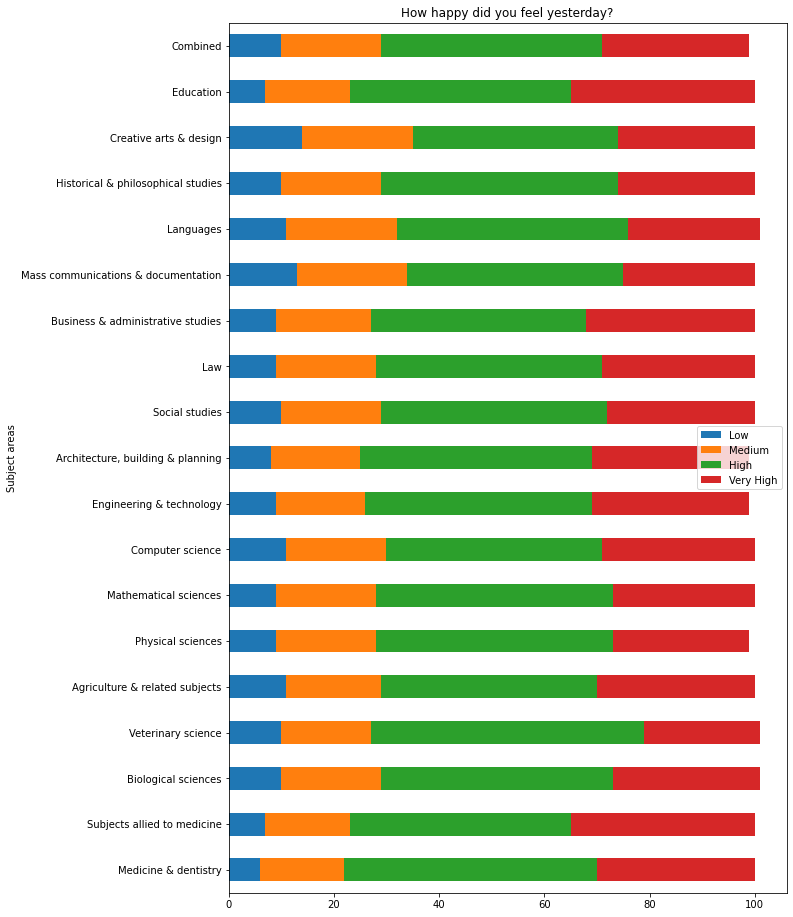

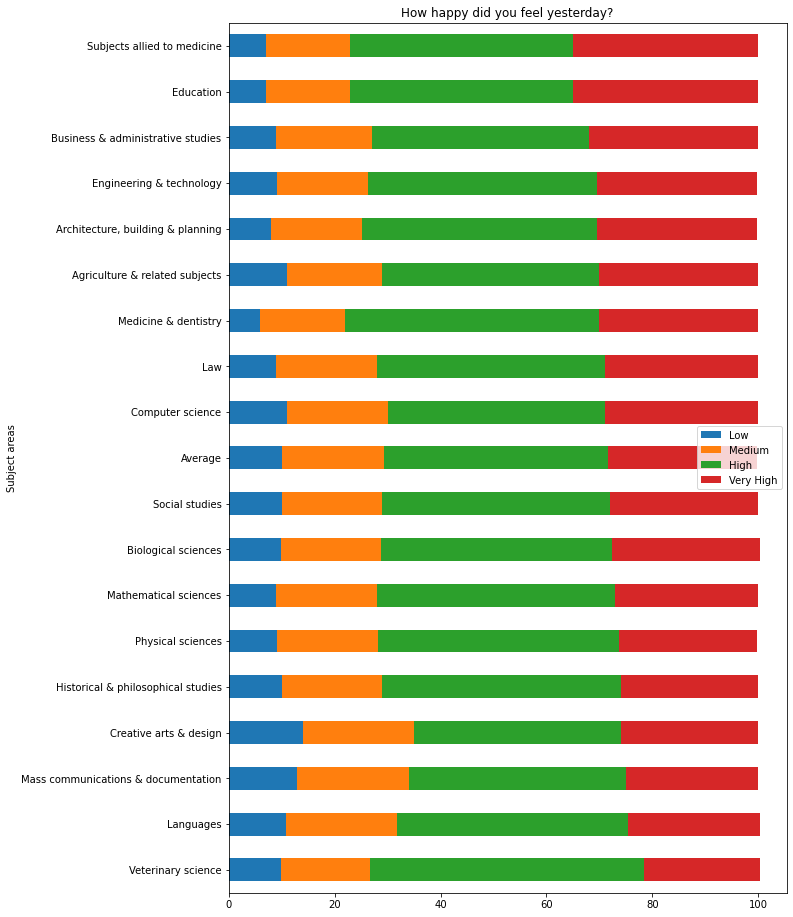

In [13]:
#creating and updating new columns
happy_data.columns = happy_data.columns.str.replace('Percentage', 'Low')
happy_data['Medium'] = ''
happy_data['High'] = ''
happy_data['Very High'] = ''

#Adds responses to each column (up to i+3), then deletes the second, third and fourth copy of row
happy_loop = (len(happy_data) - 3)
for i in range(happy_loop):
    happy_data.loc[i,'Medium'] = (happy_data.loc[(i+1),'Low']) * 100
    happy_data.loc[i,'High'] = (happy_data.loc[(i+2),'Low']) * 100
    happy_data.loc[i,'Very High'] = (happy_data.loc[(i+3),'Low']) * 100
happy_data['Low'] = happy_data['Low'] * 100

zero = 0
i_list = []
for i in range(len(happy_data)):
    if (i+zero)%4 == 0:
        i_list.append(i)

for i in range(len(happy_data)):
    if i in i_list:
        pass
    else:
        happy_data = happy_data.drop(labels=i, axis=0)   
        
happy_data.reset_index(drop=True, inplace=True)

#shows graph without proper scaling, from the CSV file values
ax = happy_data[["Low", "Medium", "High", "Very High"]].plot(kind="barh", stacked=True, xlabel='Subject areas', title='How happy did you feel yesterday?',figsize=(10,16), legend=True)
ax.set_yticklabels(happy_data['Subject area of degree'])
fig = ax.get_figure()

#fixing scaling issues by converting each value into a percentage of the total available %
happy_data['Low'] = ((happy_data['Low']/(happy_data['Low'] + happy_data['Medium'] + happy_data['High'] + happy_data['Very High']))*100)
happy_data['Medium'] = ((happy_data['Medium']/(happy_data['Low'] + happy_data['Medium'] + happy_data['High'] + happy_data['Very High']))*100)
happy_data['High'] = ((happy_data['High']/(happy_data['Low'] + happy_data['Medium'] + happy_data['High'] + happy_data['Very High']))*100)
happy_data['Very High'] = ((happy_data['Very High']/(happy_data['Low'] + happy_data['Medium'] + happy_data['High'] + happy_data['Very High']))*100)

#changing a title
happy_data.loc[18,'Subject area of degree'] = 'Average'

#sorting values to show highest percentage of 'Very High' responses first.
happy_data = happy_data.sort_values('Very High')

#creating correct stacked bar chart
ax = happy_data[["Low", "Medium", "High", "Very High"]].plot(kind="barh", stacked=True, ylabel='Percentage of responses', xlabel='Subject areas', title='How happy did you feel yesterday?',figsize=(10,16), legend=True)
ax.set_yticklabels(happy_data['Subject area of degree'])
fig = ax.get_figure()

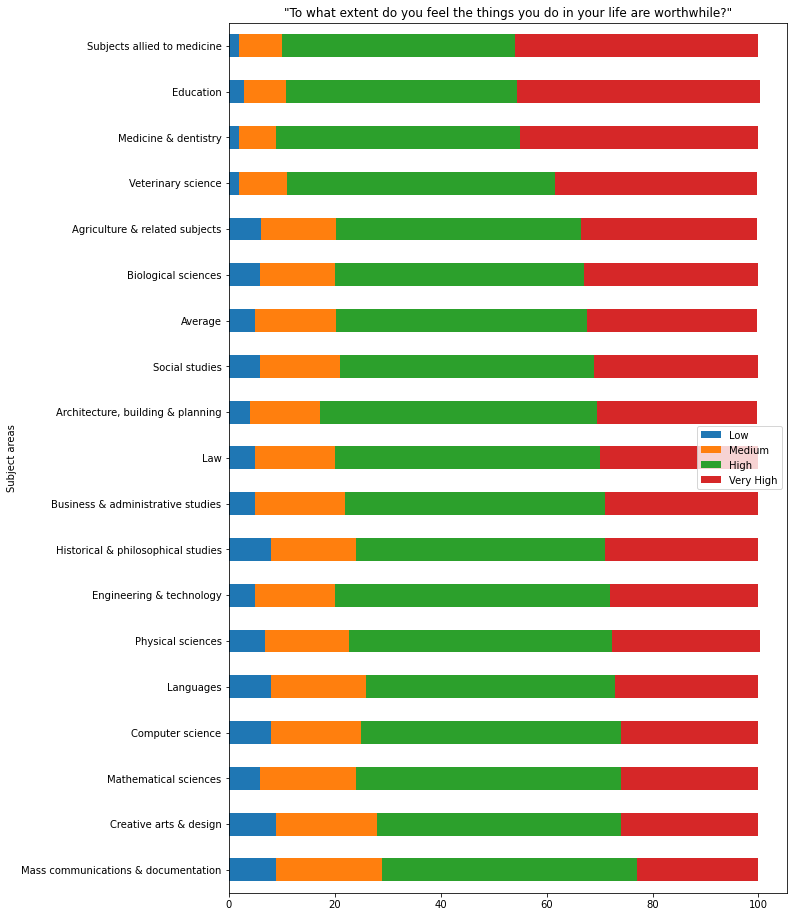

In [14]:
#conducting the same as happy_data, but without the example incorrect bar.
worthwhile_data.columns = worthwhile_data.columns.str.replace('Percentage', 'Low')
worthwhile_data['Medium'] = ''
worthwhile_data['High'] = ''
worthwhile_data['Very High'] = ''

#Adds responses to each column (up to i+3), then deletes the second, third and fourth copy of row
worthwhile_loop = (len(worthwhile_data) - 3)
for i in range(worthwhile_loop):
    worthwhile_data.loc[i,'Medium'] = (worthwhile_data.loc[(i+1),'Low']) * 100
    worthwhile_data.loc[i,'High'] = (worthwhile_data.loc[(i+2),'Low']) * 100
    worthwhile_data.loc[i,'Very High'] = (worthwhile_data.loc[(i+3),'Low']) * 100
worthwhile_data['Low'] = (worthwhile_data['Low']) * 100

zero = 0
i_list = []
for i in range(len(worthwhile_data)):
    if (i+zero)%4 == 0:
        i_list.append(i)

for i in range(len(worthwhile_data)):
    if i in i_list:
        pass
    else:
        worthwhile_data = worthwhile_data.drop(labels=i, axis=0)   
        
worthwhile_data.reset_index(drop=True, inplace=True)

worthwhile_data['Low'] = ((worthwhile_data['Low']/(worthwhile_data['Low'] + worthwhile_data['Medium'] + worthwhile_data['High'] + worthwhile_data['Very High']))*100)
worthwhile_data['Medium'] = ((worthwhile_data['Medium']/(worthwhile_data['Low'] + worthwhile_data['Medium'] + worthwhile_data['High'] + worthwhile_data['Very High']))*100)
worthwhile_data['High'] = ((worthwhile_data['High']/(worthwhile_data['Low'] + worthwhile_data['Medium'] + worthwhile_data['High'] + worthwhile_data['Very High']))*100)
worthwhile_data['Very High'] = ((worthwhile_data['Very High']/(worthwhile_data['Low'] + worthwhile_data['Medium'] + worthwhile_data['High'] + worthwhile_data['Very High']))*100)

worthwhile_data.loc[18,'Subject area of degree'] = 'Average'

worthwhile_data = worthwhile_data.sort_values('Very High')

ax = worthwhile_data[["Low", "Medium", "High", "Very High"]].plot(kind="barh", stacked=True, ylabel='Percentage of responses', xlabel='Subject areas', title='"To what extent do you feel the things you do in your life are worthwhile?"',figsize=(10,16), legend=True)
ax.set_yticklabels(worthwhile_data['Subject area of degree'])
fig = ax.get_figure()

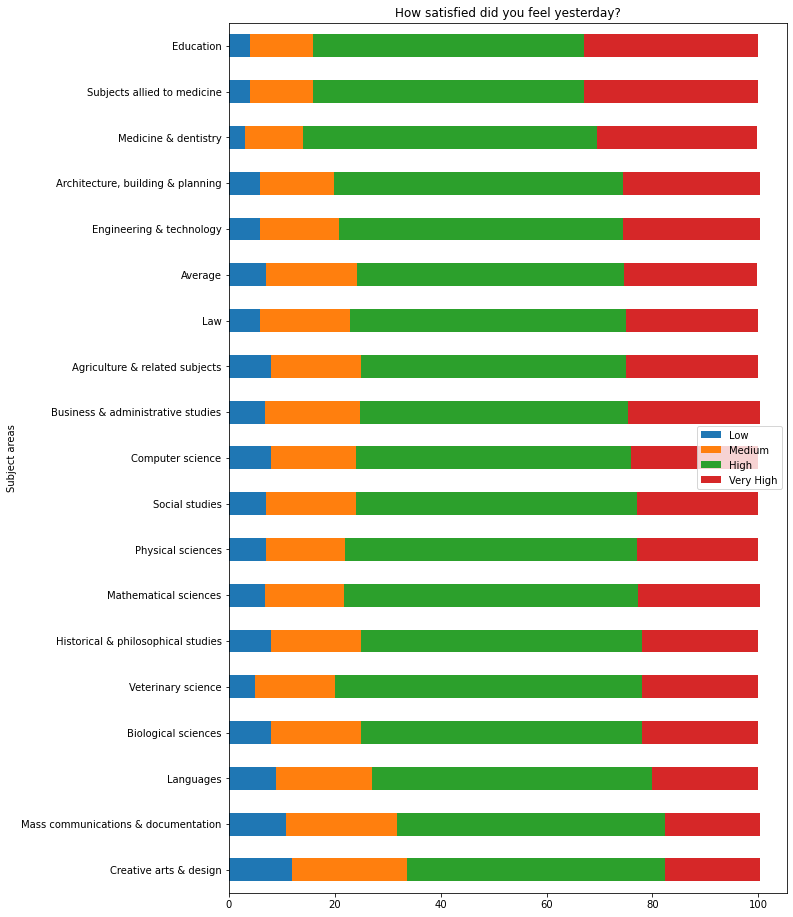

In [15]:
#conducting the same as happy_data, but without the example incorrect bar.
satisfied_data.columns = satisfied_data.columns.str.replace('Percentage', 'Low')
satisfied_data['Medium'] = ''
satisfied_data['High'] = ''
satisfied_data['Very High'] = ''

#Adds responses to each column (up to i+3), then deletes the second, third and fourth copy of row
satisfied_loop = (len(satisfied_data) - 3)
for i in range(satisfied_loop):
    satisfied_data.loc[i,'Medium'] = (satisfied_data.loc[(i+1),'Low']) * 100
    satisfied_data.loc[i,'High'] = (satisfied_data.loc[(i+2),'Low']) * 100
    satisfied_data.loc[i,'Very High'] = (satisfied_data.loc[(i+3),'Low']) * 100
satisfied_data['Low'] = (satisfied_data['Low']) * 100

zero = 0
i_list = []
for i in range(len(satisfied_data)):
    if (i+zero)%4 == 0:
        i_list.append(i)

for i in range(len(satisfied_data)):
    if i in i_list:
        pass
    else:
        satisfied_data = satisfied_data.drop(labels=i, axis=0)   
        
satisfied_data.reset_index(drop=True, inplace=True)

satisfied_data['Low'] = ((satisfied_data['Low']/(satisfied_data['Low'] + satisfied_data['Medium'] + satisfied_data['High'] + satisfied_data['Very High']))*100)
satisfied_data['Medium'] = ((satisfied_data['Medium']/(satisfied_data['Low'] + satisfied_data['Medium'] + satisfied_data['High'] + satisfied_data['Very High']))*100)
satisfied_data['High'] = ((satisfied_data['High']/(satisfied_data['Low'] + satisfied_data['Medium'] + satisfied_data['High'] + satisfied_data['Very High']))*100)
satisfied_data['Very High'] = ((satisfied_data['Very High']/(satisfied_data['Low'] + satisfied_data['Medium'] + satisfied_data['High'] + satisfied_data['Very High']))*100)

satisfied_data.loc[18,'Subject area of degree'] = 'Average'

satisfied_data = satisfied_data.sort_values('Very High')

ax = satisfied_data[["Low", "Medium", "High", "Very High"]].plot(kind="barh", stacked=True, ylabel='Percentage of responses', xlabel='Subject areas', title='How satisfied did you feel yesterday?',figsize=(10,16), legend=True)
ax.set_yticklabels(satisfied_data['Subject area of degree'])
fig = ax.get_figure()

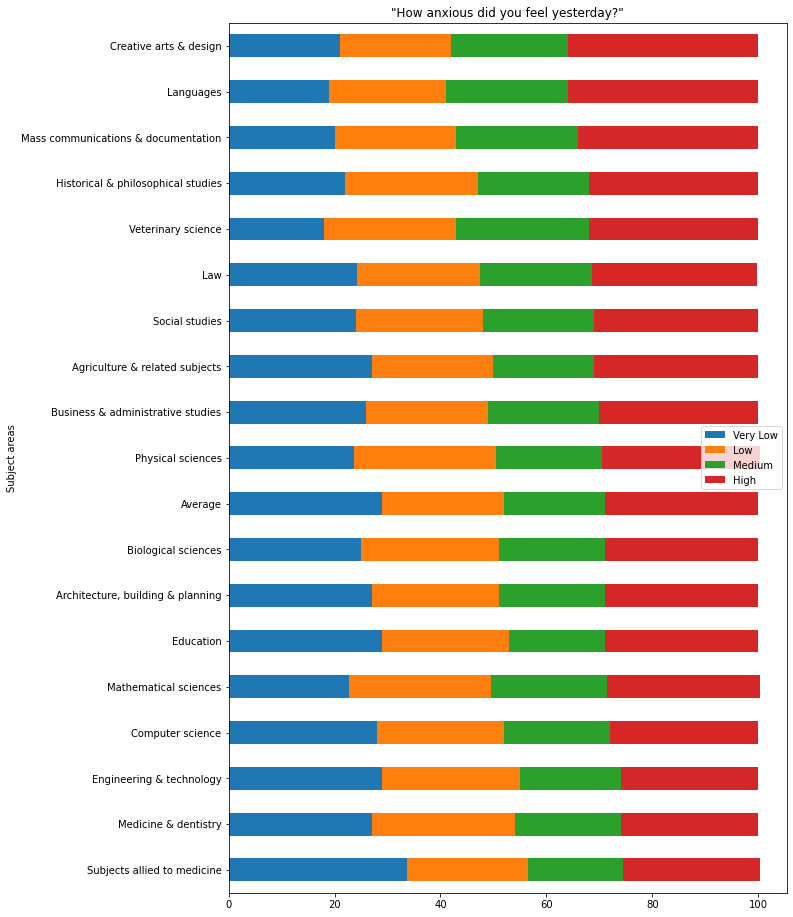

In [16]:
#conducting the same as happy_data, but without the example incorrect bar and changing response categories from 
#'Low' - 'Very High' to 'Very Low' - 'High', as per the CSV file
anxious_data.columns = anxious_data.columns.str.replace('Percentage', 'Very Low')
anxious_data['Low'] = ''
anxious_data['Medium'] = ''
anxious_data['High'] = ''

#Adds responses to each column (up to i+3), then deletes the second, third and fourth copy of row
anxious_loop = (len(anxious_data) - 3)
for i in range(anxious_loop):
    anxious_data.loc[i,'Low'] = (anxious_data.loc[(i+1),'Very Low']) * 100
    anxious_data.loc[i,'Medium'] = (anxious_data.loc[(i+2),'Very Low']) * 100
    anxious_data.loc[i,'High'] = (anxious_data.loc[(i+3),'Very Low']) * 100
anxious_data['Very Low'] = (anxious_data['Very Low']) * 100

zero = 0
i_list = []
for i in range(len(anxious_data)):
    if (i+zero)%4 == 0:
        i_list.append(i)

for i in range(len(anxious_data)):
    if i in i_list:
        pass
    else:
        anxious_data = anxious_data.drop(labels=i, axis=0)   

anxious_data.reset_index(drop=True, inplace=True)

anxious_data['Very Low'] = ((anxious_data['Very Low']/(anxious_data['Very Low'] + anxious_data['Low'] + anxious_data['Medium'] + anxious_data['High']))*100)
anxious_data['Low'] = ((anxious_data['Low']/(anxious_data['Very Low'] + anxious_data['Low'] + anxious_data['Medium'] + anxious_data['High']))*100)
anxious_data['Medium'] = ((anxious_data['Medium']/(anxious_data['Very Low'] + anxious_data['Low'] + anxious_data['Medium'] + anxious_data['High']))*100)
anxious_data['High'] = ((anxious_data['High']/(anxious_data['Very Low'] + anxious_data['Low'] + anxious_data['Medium'] + anxious_data['High']))*100)

anxious_data.loc[18,'Subject area of degree'] = 'Average'

anxious_data = anxious_data.sort_values('High')

ax = anxious_data[["Very Low", "Low", "Medium", "High"]].plot(kind="barh", stacked=True, ylabel='Percentage of responses', xlabel='Subject areas', title='"How anxious did you feel yesterday?"',figsize=(10,16), legend=True)
ax.set_yticklabels(anxious_data['Subject area of degree'])
fig = ax.get_figure()